In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append("..")
from utils import *

In [13]:
def f1(y,x):
    return (x+y)**2
def f1_ana(x):
    return np.tan(x+np.pi/4.0) - x 

In [14]:
a = 0 ; b = np.pi/5.0
h_s =  [0.1,0.25,0.45]
f_in = 1

In [22]:
def RK_4(a,b,f,f_in,h):
    x_s = [a]
    y_s = [f_in]
    n = int((b-a)/h)
    for i in range(n):
        k1 = h * f(y_s[-1],x_s[-1])
        k2 = h * f(y_s[-1] + k1/2.0 ,x_s[-1] + h/2 )
        k3 = h * f(y_s[-1] + k2/2.0 ,x_s[-1] + h/2 )
        k4 = h * f(y_s[-1] + k3 ,x_s[-1] + h )
        x_s.append(x_s[-1]+h)
        y_s.append(y_s[-1]+1/6.0*(k1 + 2*k2 + 2*k3 + k4))
    return x_s , y_s

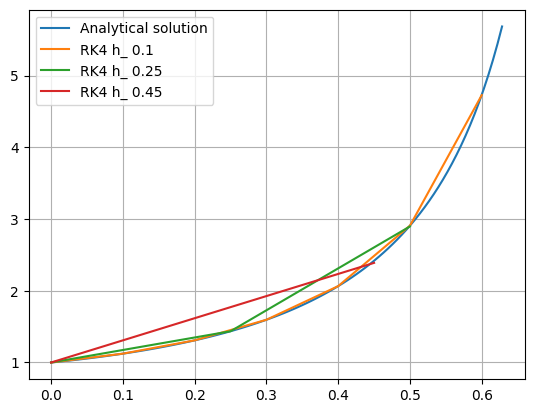

In [23]:
x_s = np.linspace(a,b,100)
plt.plot(x_s,[f1_ana(item) for item in x_s],label = "Analytical solution")
for h_ in h_s:
    x,y = RK_4(a,b,f1,f_in,h_)
    plt.plot(x,y,label = f"RK4 h_ {h_}")
plt.legend()
plt.grid(True)
plt.show()

## Question-2 

In [2]:
a = 0.0 ; b = 40.0;
t_0 = 0 ; x_0 = 1.0 ; v_0 = 0.0 ;
k = 1.0 ; m = 1.0 ; mu = 0.15 ;
h = 0.1 ; 


In [1]:
def SHO(dx_dt , dv_dt , v_0 , x_0 , t_0 , t_ , h):
    t_list = [t_0]
    x_list = [x_0]
    v_list = [v_0]
    n = int((t_ - t_0)/h)
    for i in range(n):
        k1x = h * dx_dt(v_list[-1],x_list[-1],t_list[-1])
        k1v = h * dv_dt(v_list[-1],x_list[-1],t_list[-1])
        k2x = h * dx_dt(v_list[-1]+ k1v/2,x_list[-1] + k1x/2 ,t_list[-1] + h/2)
        k2v = h * dv_dt(v_list[-1]+ k1v/2,x_list[-1] + k1x/2 ,t_list[-1] + h/2)
        k3x = h * dx_dt(v_list[-1]+ k2v/2,x_list[-1] + k2x/2 ,t_list[-1] + h/2)
        k3v = h * dv_dt(v_list[-1]+ k2v/2,x_list[-1] + k2x/2 ,t_list[-1] + h/2)
        k4x = h * dx_dt(v_list[-1]+ k3v,x_list[-1] + k3x ,t_list[-1] + h)
        k4v = h * dv_dt(v_list[-1]+ k3v,x_list[-1] + k3x ,t_list[-1] + h)
        t_list.append(t_list[-1] + h)
        x_list.append(x_list[-1] + (k1x + 2*k2x + 2*k3x + k4x)/6.0)
        v_list.append(v_list[-1] + (k1v + 2*k2v + 2*k3v + k4v)/6.0)
    return t_list , x_list , v_list

In [4]:
def dx_dt(v,x,t):
    return v
def dv_dt(v,x,t):
    return -0.15 * v - x  

In [5]:
t_list , x_list , v_list = SHO(dx_dt , dv_dt , v_0 , x_0 , t_0 , b , 0.1)

In [12]:
E = [1/2.0 * v_list[i]**2 + 1/2 * x_list[i]**2 for i in range(len(x_list))]

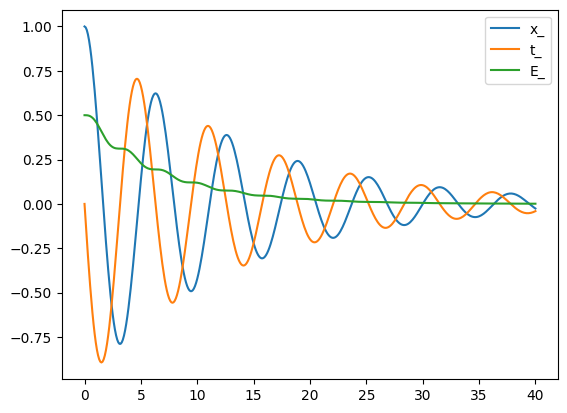

In [13]:
plt.plot(t_list,x_list,label = "x_")
plt.plot(t_list,v_list,label = "t_")
plt.plot(t_list,E,label = "E_")
plt.legend()
plt.show()

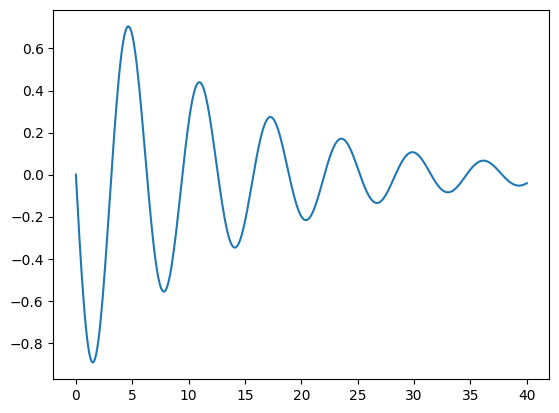

In [9]:
plt.plot(t_list,v_list)